In [2]:
# Importing libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing the dataset:

df = pd.read_csv('/home/student/Desktop/ml project/crop_recommendation.csv')

In [4]:
#understanding the data
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [6]:
df.size

17600

In [7]:
df.shape

(2200, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [9]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [10]:
df['label']

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

In [11]:
df['label'].value_counts()  

cotton         100
banana         100
mungbean       100
muskmelon      100
pigeonpeas     100
jute           100
watermelon     100
maize          100
coconut        100
mango          100
orange         100
grapes         100
chickpea       100
kidneybeans    100
coffee         100
apple          100
mothbeans      100
blackgram      100
lentil         100
pomegranate    100
papaya         100
rice           100
Name: label, dtype: int64

In [12]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [13]:
#data preprocessing
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [14]:
df.isnull()

,N,P,K,temperature,humidity,ph,rainfall,label
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2195,False,False,False,False,False,False,False,False
2196,False,False,False,False,False,False,False,False
2197,False,False,False,False,False,False,False,False
2198,False,False,False,False,False,False,False,False


In [15]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [16]:
df.duplicated().sum()

0

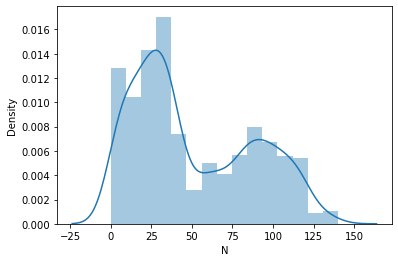

In [17]:
import matplotlib.pyplot as plt
sns.distplot(df['N'])
plt.show()

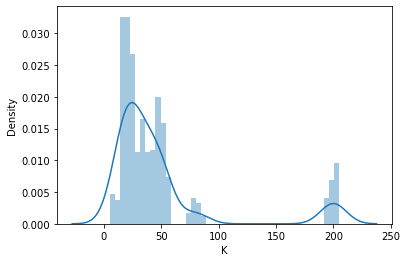

In [18]:
import matplotlib.pyplot as plt
sns.distplot(df['K'])
plt.show()

In [19]:

features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']

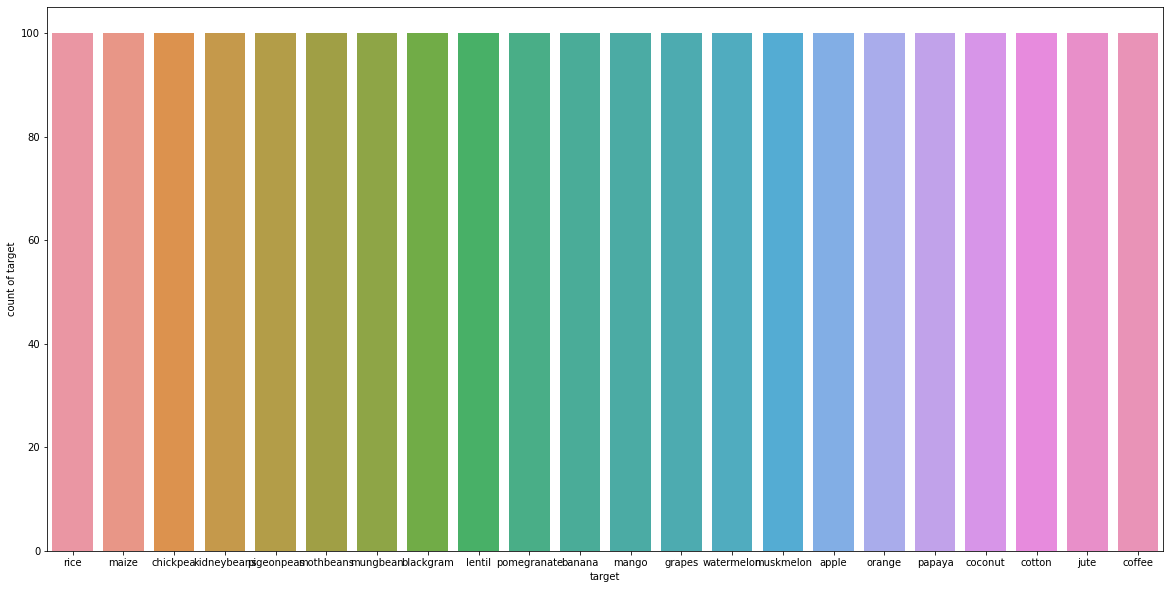

In [20]:
plt.figure(figsize=[20,10])
sns.countplot(df['label'])
plt.xlabel("target")
plt.ylabel("count of target")
plt.show()

In [21]:
# Initialzing empty lists to append all model's name and corresponding name
accuracy = []
model = []

In [22]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2)

In [23]:
Xtrain

,N,P,K,temperature,humidity,ph,rainfall
952,23,5,44,21.207254,94.263047,7.163005,107.566080
1241,36,128,204,25.235423,80.687005,5.695793,67.038409
1586,12,129,205,22.362383,91.157616,6.119432,118.683273
904,0,27,38,22.445813,89.901470,6.738016,109.390600
382,0,55,22,22.986669,20.579406,5.916779,143.858494
...,...,...,...,...,...,...,...
1373,104,23,47,26.982128,86.700683,6.770434,42.912922
572,3,56,17,28.199121,53.505676,8.709292,52.135805
1397,96,18,50,25.331045,84.305338,6.904242,41.532187
1459,95,16,46,27.076727,90.143626,6.746695,24.451465


In [24]:
Ytrain

952     pomegranate
1241         grapes
1586          apple
904     pomegranate
382     kidneybeans
           ...     
1373     watermelon
572       mothbeans
1397     watermelon
1459      muskmelon
2129         coffee
Name: label, Length: 1760, dtype: object

In [25]:
len(Xtrain)

1760

In [26]:
len(Ytrain)

1760

In [27]:
len(Xtest)

440

In [28]:
len(Ytest)

440

In [29]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
accuracy.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9568181818181818
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        17
      banana       1.00      1.00      1.00        22
   blackgram       0.75      0.82      0.78        11
    chickpea       1.00      1.00      1.00        20
     coconut       0.96      1.00      0.98        22
      coffee       0.91      1.00      0.95        20
      cotton       0.96      0.96      0.96        25
      grapes       1.00      1.00      1.00        22
        jute       0.83      0.87      0.85        23
 kidneybeans       1.00      1.00      1.00        23
      lentil       0.89      0.94      0.91        17
       maize       0.93      0.72      0.81        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.96      0.92      0.94        26
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        16
      orange       1.00   

In [30]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
accuracy.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  91.36363636363637
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        17
      banana       1.00      1.00      1.00        22
   blackgram       0.48      1.00      0.65        11
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        22
      coffee       1.00      0.90      0.95        20
      cotton       1.00      1.00      1.00        25
      grapes       1.00      1.00      1.00        22
        jute       1.00      0.26      0.41        23
 kidneybeans       1.00      0.87      0.93        23
      lentil       0.85      1.00      0.92        17
       maize       0.75      0.83      0.79        18
       mango       1.00      0.95      0.98        21
   mothbeans       1.00      0.54      0.70        26
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        16
      orange       1.00      1.00

In [31]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
accuracy.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.9931818181818182
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        17
      banana       1.00      1.00      1.00        22
   blackgram       1.00      1.00      1.00        11
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        22
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        25
      grapes       1.00      1.00      1.00        22
        jute       0.92      0.96      0.94        23
 kidneybeans       1.00      1.00      1.00        23
      lentil       1.00      1.00      1.00        17
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      1.00      1.00        26
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        16
      orange       1.00      1.00 

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

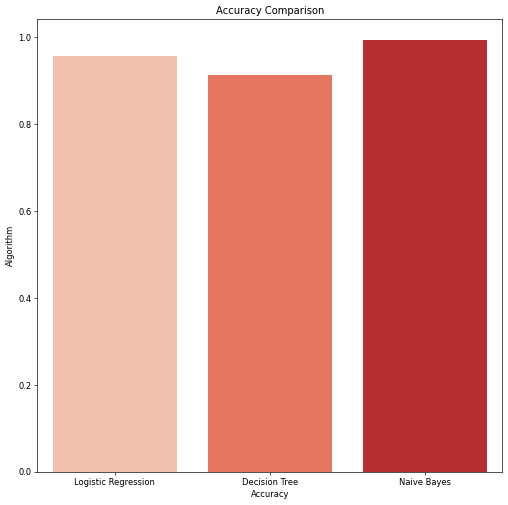

In [32]:
plt.figure(figsize=[10,10],dpi = 60)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x =model,y = accuracy,palette='Reds')

In [33]:
accuracy_models = dict(zip(model, accuracy))
print("accuraccy of the algorithms:\n")
for k, v in accuracy_models.items():
    print (k, '-->', v*100)

accuraccy of the algorithms:

Logistic Regression --> 95.68181818181817
Decision Tree --> 91.36363636363637
Naive Bayes --> 99.31818181818181


In [34]:
#using naivebayes algorithm



N=int(input("enter the nitrogen value:"))
P=int(input("enter the phosporous value:"))
K=int(input("enter the pottasium value:"))
temp=float(input("enter the temperature:"))
humi=float(input("enter the humidity:"))
ph=float(input("enter the ph of the soil:"))
rainfall=float(input("enter the rainfall:"))
data =np.array([[N,P,K,temp,humi,ph,rainfall]])
prediction = NaiveBayes.predict(data)
print("the crop recommended in this feild is",prediction)

enter the nitrogen value:84
enter the phosporous value:34
enter the pottasium value:40
enter the temperature:26
enter the humidity:80
enter the ph of the soil:6
enter the rainfall:244
the crop recommended in this feild is ['rice']
